   # Walmart Store Sales Prediction

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the dataset

In [3]:
df = pd.read_csv("Walmart.csv")

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


# Exploratory Data Analysis

In [9]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [10]:
days = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5: 'Friday',6:'Saturday'}
df['Day'] = df['Day'].map(days)
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
        9:'September',10:'October',11:'Novemenber',12:'December'}
df['Month']= df['Month'].map(months)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


In [11]:
for i in ['Store','Fuel_Price','Unemployment','Day','Month','Year']:
    print(f'{i}: {df[i].nunique()}')

Store: 45
Fuel_Price: 892
Unemployment: 349
Day: 7
Month: 12
Year: 3


In [12]:
df.shape

(6435, 10)

<AxesSubplot:xlabel='Year', ylabel='count'>

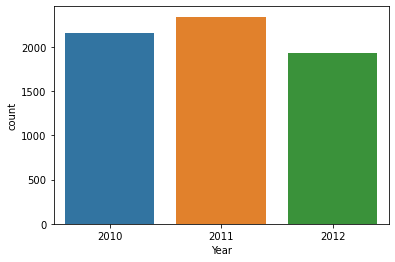

In [13]:
sns.countplot(df['Year'])

2011 has the recorded highest number of sales than followed by 2010 and 2012.

<AxesSubplot:xlabel='Day', ylabel='count'>

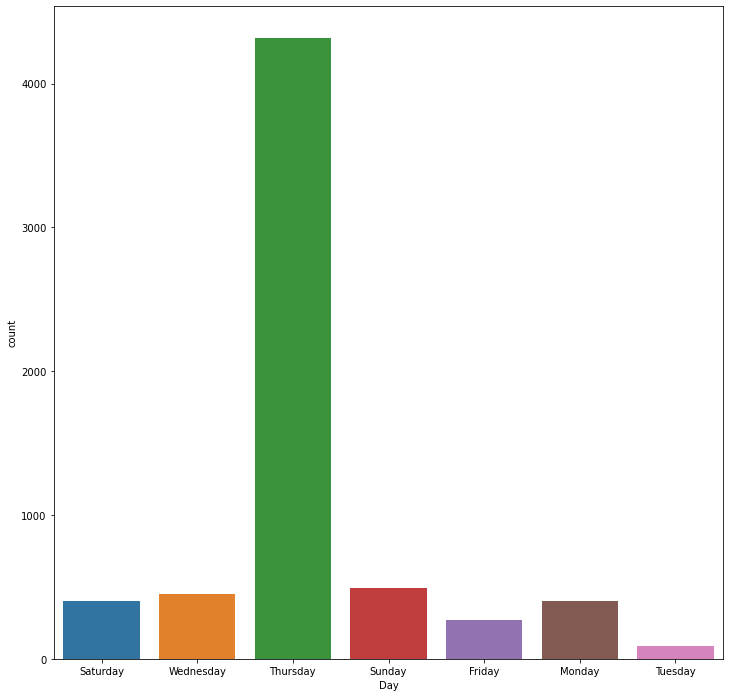

In [14]:
plt.figure(figsize=(12,12))
sns.countplot(df['Day'])

More than 50% of sales happen on Thursday.

<AxesSubplot:xlabel='Month', ylabel='count'>

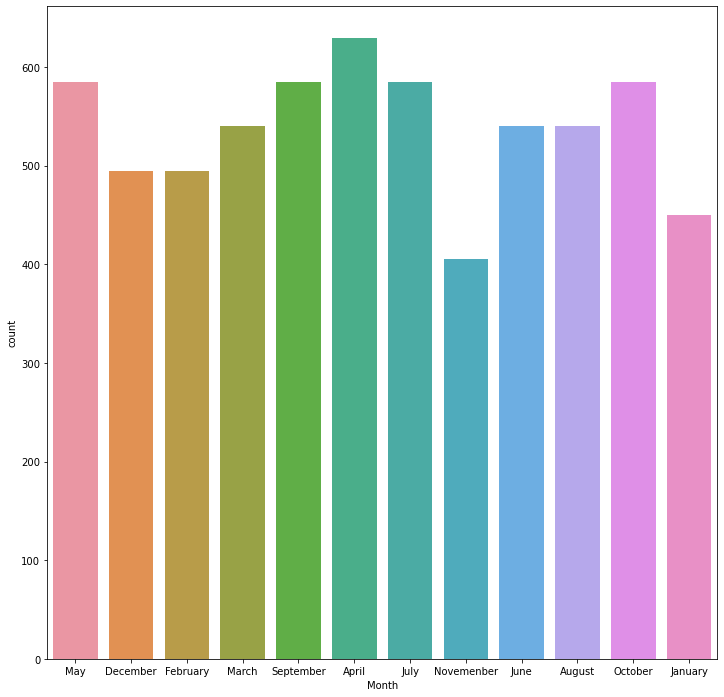

In [15]:
plt.figure(figsize=(12,12))
sns.countplot(df['Month'])

Highest sales are recorded in April then followed by May, October, December ,September although their is little variance.

In [16]:
df.groupby('Year')['Weekly_Sales'].sum()

Year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64

Text(0.5, 1.0, 'Annual Sales')

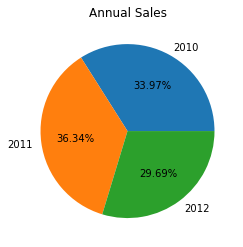

In [17]:
plt.pie(df.groupby('Year')['Weekly_Sales'].sum(),labels=df['Year'].unique(),normalize=True,autopct='%1.2f%%')
plt.title('Annual Sales')

In [18]:
df2 = df.groupby('Day')['Weekly_Sales'].sum().reset_index()
df2.head(10)

,Day,Weekly_Sales
0,Friday,2.824947e+08
1,Monday,4.335075e+08
2,Saturday,4.266091e+08
3,Sunday,5.390133e+08
4,Thursday,4.486257e+09
5,Tuesday,9.271282e+07
6,Wednesday,4.766244e+08


([<matplotlib.patches.Wedge at 0x263fc3aff70>,
 [Text(1.0904699850328354, 0.14448256553123598, 'Friday'),
  Text(0.9829060316235633, 0.4938580089438856, 'Monday'),
  Text(0.7120974620854462, 0.8384015771045916, 'Saturday'),
  Text(0.2762389849519859, 1.0647497467446032, 'Sunday'),
  Text(-0.9553304829562036, -0.5452922778975208, 'Thursday'),
  Text(0.9717354970821146, -0.5154901780932163, 'Tuesday'),
  Text(1.0729438350515599, -0.24246964103749427, 'Wednesday')],
 [Text(0.5948018100179102, 0.0788086721079469, '4.19%'),
  Text(0.5361305627037617, 0.2693770957875739, '6.43%'),
  Text(0.3884167975011525, 0.457309951147959, '6.33%'),
  Text(0.15067580997381047, 0.5807725891334199, '8.00%'),
  Text(-0.5210893543397473, -0.2974321515804658, '66.59%'),
  Text(0.5300375438629715, -0.2811764607781179, '1.38%'),
  Text(0.5852420918463053, -0.13225616783863323, '7.07%')])

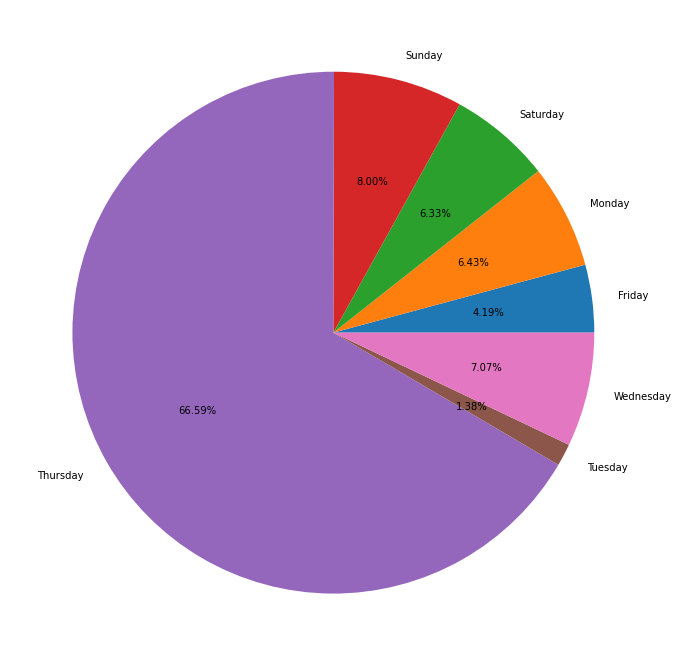

In [19]:
plt.figure(figsize=(12,12))
plt.pie(df2['Weekly_Sales'],labels= df2['Day'],autopct='%1.2f%%', normalize=True)

In [20]:
df3 = df.groupby('Month')['Weekly_Sales'].sum().reset_index()
df3.head()

,Month,Weekly_Sales
0,April,6.453239e+08
1,August,5.642317e+08
2,December,5.990761e+08
3,February,5.220257e+08
4,January,4.264263e+08


([<matplotlib.patches.Wedge at 0x263fc935c40>,
 [Text(1.0505715420703448, 0.3260359412579202, 'April'),
  Text(0.7135560893168025, 0.8371605027704733, 'August'),
  Text(0.17894470808660848, 1.0853473137423792, 'December'),
  Text(-0.38685422481986037, 1.0297299688457286, 'February'),
  Text(-0.7903461501230193, 0.7650836313670042, 'January'),
  Text(-1.0529134511925988, 0.3183916837759601, 'July'),
  Text(-1.0654902855032773, -0.27336870980078276, 'June'),
  Text(-0.7840328017971336, -0.7715520499008066, 'March'),
  Text(-0.2752227535923998, -1.0650128806286887, 'May'),
  Text(0.26538381737518074, -1.0675071098008562, 'Novemenber'),
  Text(0.7408373645676252, -0.8131174572351131, 'October'),
  Text(1.0585579767623141, -0.29909030380952856, 'September')],
 [Text(0.5730390229474608, 0.1778377861406837, '9.58%'),
  Text(0.3892124123546195, 0.4566330015111672, '8.37%'),
  Text(0.09760620441087733, 0.5920076256776613, '8.89%'),
  Text(-0.21101139535628746, 0.5616708920976701, '7.75%'),
  Te

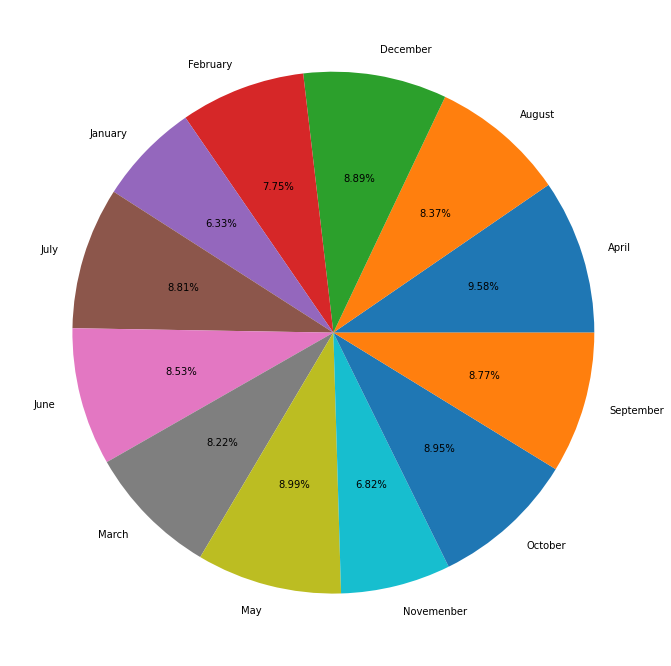

In [21]:
plt.figure(figsize=(12,12))
plt.pie(df3['Weekly_Sales'],labels=df3['Month'],normalize=True,autopct='%1.2f%%')

In [22]:
df4 = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()
df4.head()

,Holiday_Flag,Weekly_Sales
0,0,6.231919e+09
1,1,5.052996e+08


([<matplotlib.patches.Wedge at 0x263fc6a1580>,
 [Text(-1.0696059603508306, 0.2567938659352628, 'Non Special Holiday Week'),
  Text(1.0696059783829106, -0.25679379082745957, 'Special Holiday Week')],
 [Text(-0.5834214329186348, 0.14006938141923425, '92.50%'),
  Text(0.5834214427543147, -0.14006934045134156, '7.50%')])

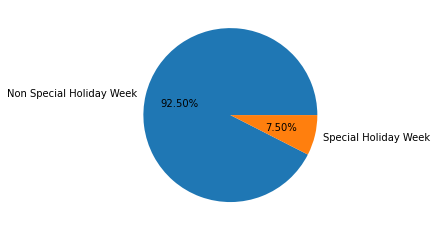

In [23]:
plt.pie(df4['Weekly_Sales'],labels= ['Non Special Holiday Week','Special Holiday Week'],normalize=True,autopct='%1.2f%%')

In [24]:
df.groupby('Store')['Weekly_Sales'].count()

Store
1     143
2     143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
22    143
23    143
24    143
25    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
45    143
Name: Weekly_Sales, dtype: int64

In [25]:
df.groupby('Store')['Weekly_Sales'].sum().reset_index()

,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [26]:
df.groupby('Store')['Weekly_Sales'].sum().max()

301397792.46000004

# Outliers

In [27]:
print(df.columns)

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

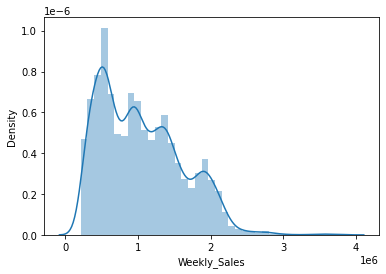

In [28]:
sns.distplot(df['Weekly_Sales'],kde=True)

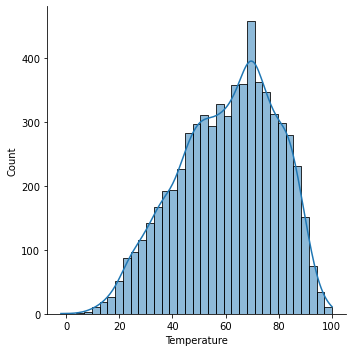

In [29]:
sns.displot(df['Temperature'],kde=True)

<AxesSubplot:xlabel='Temperature'>

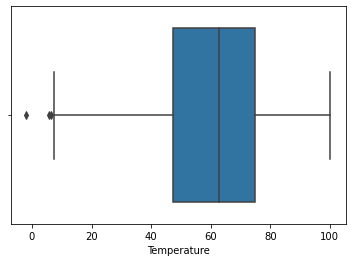

In [30]:
sns.boxplot(df['Temperature'])

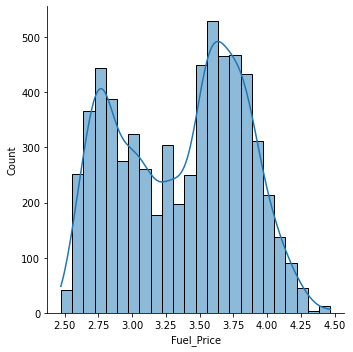

In [31]:
sns.displot(df['Fuel_Price'],kde=True)

<AxesSubplot:xlabel='Fuel_Price'>

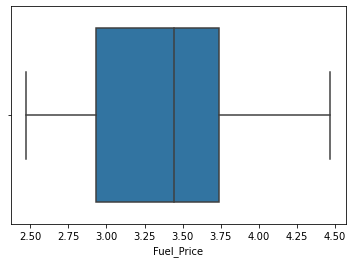

In [32]:
sns.boxplot(df['Fuel_Price'])

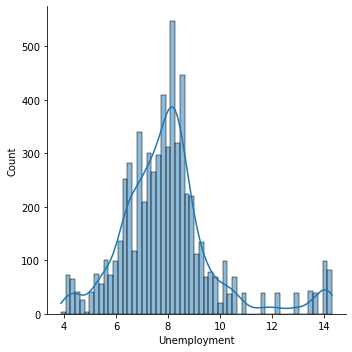

In [33]:
sns.displot(df['Unemployment'],kde=True)

<AxesSubplot:xlabel='Unemployment'>

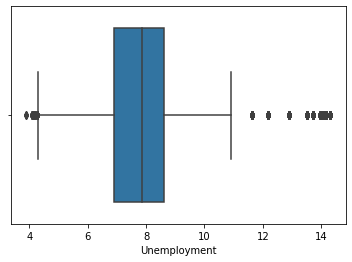

In [34]:
sns.boxplot(df['Unemployment'])

<AxesSubplot:xlabel='CPI'>

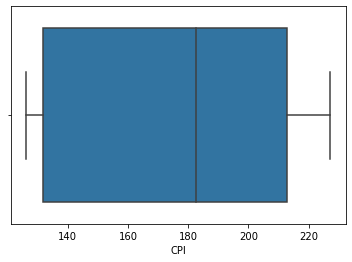

In [35]:
sns.boxplot(df['CPI'])

Data Preprocessing

Removal of Outliers - Unemployment

Encoding - categorical varaible - Target Encoding

In [36]:
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Unemployment'] >= Q1-3*(IQR)]
df.shape
df = df[df['Unemployment'] <= Q3+3*(IQR)]
df.shape

(6255, 10)

In [37]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3-Q1

df = df[df['Temperature'] >= Q1-1.5*(IQR)]
df.shape
df = df[df['Temperature'] <= Q3+1.5*(IQR)]
df.shape

(6253, 10)

<AxesSubplot:xlabel='Temperature'>

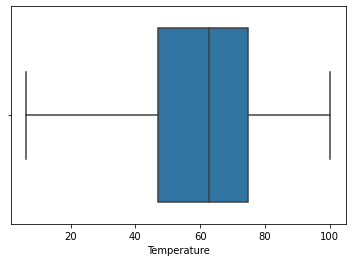

In [38]:
sns.boxplot(df['Temperature'])

<AxesSubplot:xlabel='Unemployment'>

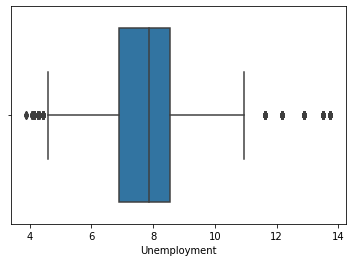

In [39]:
sns.boxplot(df['Unemployment'])

# Encoding

In [40]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,Saturday,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,Wednesday,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,Thursday,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,Thursday,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,Sunday,May,2010


Data Manipulation

Encoding - using column transformer

Scaling

Splitting data

In [41]:
# Target guided encoding of day ,month, year column - ranked as per the sales
tge= {'Sunday':5,'Monday':3, 'Tuesday':0, 'Wednesday':4, 'Thursday':6,  'Friday':1,'Saturday':2}
df['Day'] = df['Day'].map(tge)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,May,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,December,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,6,February,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,6,February,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,May,2010


In [42]:
yr = {2010:1, 2011:2, 2012:0}
df['Year'] = df['Year'].map(yr)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,May,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,December,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,6,February,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,6,February,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,May,1


In [43]:
mn = {'January':1,'February':3,'March':4,'April':12,'May':11,'June':6,'July':8,
      'August':5,'September':7,'October':10,'Novemenber':2,'December':9}
df['Month'] = df['Month'].map(mn)
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,11,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,9,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,6,3,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,6,3,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,11,1


In [44]:
X = df.drop(['Weekly_Sales'],axis=1)
Y = df['Weekly_Sales']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[('tf',OneHotEncoder(sparse=False,drop='first'),['Store'])],
                                remainder='passthrough')

In [47]:
X_train= transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [48]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,11,1
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,9,1
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,6,3,1
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,6,3,1
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,11,1


# Scaling

In [49]:
from sklearn.preprocessing import RobustScaler
std = RobustScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# Feature Selection

Text(0.5, 1.0, 'Correlation Matrix')

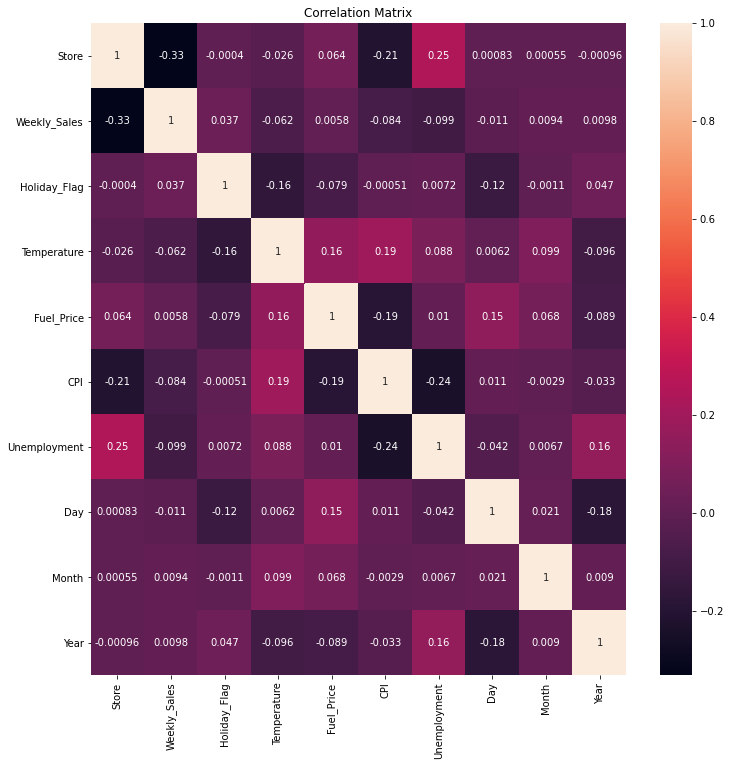

In [50]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')

# Predictive Modelling

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
lr = LinearRegression()
lr.fit(X_train,Y_train)
y_pred = lr.predict(X_test)

print(mean_squared_error(Y_test,y_pred))

24332162865.77858


In [55]:
print(mean_absolute_error(Y_test,y_pred))

93332.53798059518


In [56]:
print(r2_score(Y_test,y_pred))

0.924123826020811
